In [4]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats

# matplotlib 설정
%matplotlib inline
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

In [7]:
# 이항검정
# scipy.stats.binom_test(x, n=None, p=0.5, alternative='two-sided')

N = 10
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

7

In [8]:
sp.stats.binom_test(n, N)

0.3437499999999999

In [9]:
N = 100
mu_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

49

In [10]:
sp.stats.binom_test(n, N)

0.9204107626128206

In [11]:
N = 100
mu_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)
n

31

In [12]:
sp.stats.binom_test(n, N)

0.00018314322488235352

In [ ]:
# 카이제곱 검정

# scipy.stats.chisquare(f_obs, f_exp=None)

# f_obs : 데이터 행렬
# f_exp : 기댓값 행렬

In [13]:
N = 10
K = 4
mu_0 = np.ones(K)/K
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2], dtype=int64)

In [14]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [15]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11], dtype=int64)

In [16]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

### 카이제곱 독립검정
- 카이제곱검정은 어떤 범주형 확률변수  X 가 다른 범주형 확률변수  Y 와 독립인지 상관관계를 가지는가를 검증

### chi2_contingency() 
- 튜플로 반환되며 첫번째 값이 검정통계량, 두번째 값이 유의확률이다.

In [17]:
obs = np.array([[5, 15], [10, 20]])
sp.stats.chi2_contingency(obs)

(0.0992063492063492,
 0.7527841326498471,
 1,
 array([[ 6., 14.],
        [ 9., 21.]]))

### 단일표본 z검정

In [18]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [19]:
def ztest_1samp(x, sigma2=1, mu=0):
    z = (x.mean() - mu) / np.sqrt(sigma2/len(x))
    return z, 2 * sp.stats.norm().sf(np.abs(z))

ztest_1samp(x)

(2.3338341854824276, 0.019604406021683538)

In [20]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
ztest_1samp(x)

(0.5980801553448499, 0.5497864508624168)

### 단일표본 t검정
#### scipy.stats.ttest_1samp(a, popmean)

- a: 표본 데이터 배열
- popmean: 귀무가설의 기댓값

In [21]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=2.28943967238967, pvalue=0.04781846490857058)

In [22]:
N = 100
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sp.stats.ttest_1samp(x, popmean=0)

Ttest_1sampResult(statistic=0.5904283402851698, pvalue=0.5562489158694675)

### 독립표본 t검정

#### scipy.stats.ttest_inds(a, b, equal_var=True)

- a: 1번 표본 집합 데이터
- b: 2번 표본 집합 데이터
- equal_var: 두 표본 집합의 분산이 같은경우에는 True

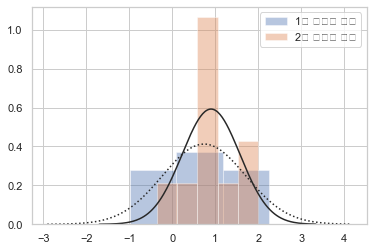

In [26]:
%matplotlib inline
N_1 = 10
mu_1 = 0
sigma_1 = 1
N_2 = 10
mu_2 = 0.5
sigma_2 = 1
np.random.seed(0)
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [27]:
np.mean(x1), np.mean(x2)

(0.7380231707288347, 0.9006460151624349)

In [28]:
sp.stats.ttest_ind(x1, x2, equal_var=False)

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)

- 귀무가설이 거짓임에도 불구하고 진실로 나온 경우로 2종오류(Type 2 Error)

### 대응표본 t검정

#### 대응표본 t검정은 ttest_rel 명령을 사용한다.

- ttest_rel(a, b)

- a: 1번 표본 집합 데이터
- b: 2번 표본 집합 데이터

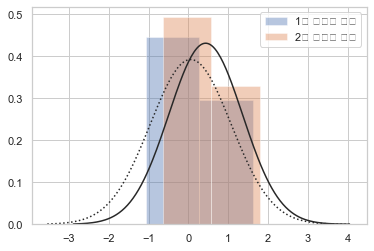

In [29]:
N = 5
mu_1 = 0
mu_2 = 0.4
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)

ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [30]:
sp.stats.ttest_rel(x1, x2)

Ttest_relResult(statistic=-5.662482449248929, pvalue=0.0047953456833781305)

### 등분산검정

- 사이파이의 stats 서브패키지는 이를 위한 bartlett, fligner, levene 명령을 제공한다.

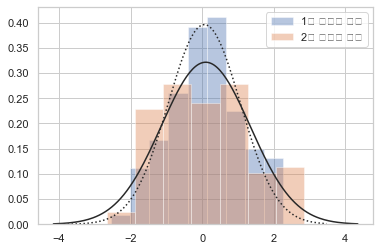

In [31]:
N1 = 100
N2 = 100
sigma_1 = 1
sigma_2 = 1.2
np.random.seed(0)
x1 = sp.stats.norm(0, sigma_1).rvs(N1)
x2 = sp.stats.norm(0, sigma_2).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [32]:
x1.std(), x2.std()

(1.0078822447165796, 1.2416003969261071)

In [33]:
sp.stats.bartlett(x1, x2)

BartlettResult(statistic=4.253473837232266, pvalue=0.039170128783651344)

In [34]:
sp.stats.fligner(x1, x2)

FlignerResult(statistic=7.224841990409457, pvalue=0.007190150106748367)

In [35]:
sp.stats.levene(x1, x2)

LeveneResult(statistic=7.680708947679437, pvalue=0.0061135154970207925)

### 정규성검정
- 회귀 분석 등에서는 확률분포가 가우시안 정규분포를 따르는지 아닌지를 확인하는 것이 중요하다. 이러한 검정을 정규성검정(normality test)

### 사이파이 에서 제공하는 정규성검정 명령어

#### 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : scipy.stats.ks_2samp
- 샤피로-윌크 검정(Shapiro–Wilk test) : scipy.stats.shapiro
- 앤더스-달링 검정(Anderson–Darling test) : scipy.stats.anderson
- 다고스티노 K-제곱 검정(D'Agostino's K-squared test) : scipy.stats.mstats.normaltest
StatsModels에서 제공하는 정규성검정 명령어

#### 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) : statsmodels.stats.diagnostic.kstest_normal
- 옴니버스 검정(Omnibus Normality test) : statsmodels.stats.stattools.omni_normtest
- 자크-베라 검정(Jarque–Bera test) : statsmodels.stats.stattools.jarque_bera
- 릴리포스 검정(Lilliefors test) : statsmodels.stats.diagnostic.lillifors

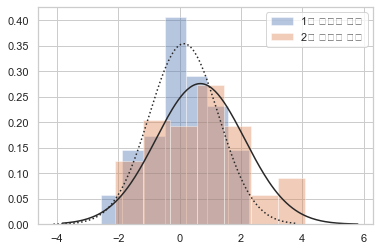

In [36]:
np.random.seed(0)
N1 = 50
N2 = 100
x1 = sp.stats.norm(0, 1).rvs(N1)
x2 = sp.stats.norm(0.5, 1.5).rvs(N2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집합")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집합")
ax.lines[0].set_linestyle(":")
plt.legend()
plt.show()

In [37]:
sp.stats.ks_2samp(x1, x2)

KstestResult(statistic=0.23, pvalue=0.05550723364321564)